### OMP Version 4
Firstly, let us generate some data, and let us compute the coefficients using OMP Version 3.

In [2]:
# standard libraries
import numpy as np
import matplotlib.pyplot as plt

import sys
sys.path.append("..")
import helper.helper as h
import helper.methods as m

from importlib import reload  # Python 3.4+

In [3]:
# reload helper and methods for when things change
reload(m);
reload(h);

True W:
[[ 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.  ]
 [-0.4   0.46  0.    0.    0.    0.    0.    0.    0.    0.  ]
 [ 0.    0.    0.3   0.    0.    0.    0.    0.    0.    0.  ]
 [ 0.    0.    0.44  0.27  0.    0.    0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.    0.38  0.    0.    0.    0.    0.  ]
 [ 0.    0.    0.   -0.26  0.31  0.4   0.    0.    0.    0.  ]
 [ 0.   -0.37 -0.4   0.    0.    0.    0.41  0.    0.    0.  ]
 [-0.35  0.    0.    0.    0.    0.   -0.4   0.    0.    0.  ]
 [ 0.    0.    0.   -0.36  0.   -0.35  0.    0.    0.37  0.  ]
 [ 0.    0.    0.35  0.41  0.    0.44  0.    0.    0.    0.  ]].



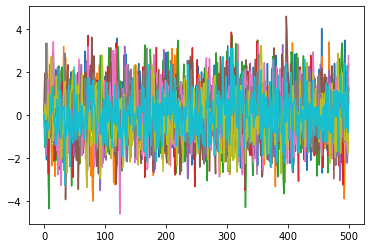

In [4]:
## Number of dimensions, number of edges, number of samples
T, n, s = 500, 10, 20

### Coefficient matrix
## First approach: A is a DAG, no model mismatch
A_true = h.generate_A(n, s, tril = False, low = 0.25, high = 0.50)

## Second approach: A is not necessarily a DAG, possible model mismatch
# A_true = (np.array([0.0] * (n ** 2 - s) + [1.0] * s) * (2 * np.random.randint(0, 2, size=(n ** 2)) - 1) * np.random.uniform(low = 0.45, high = 0.55, size = n ** 2))

# shuffle for randomness
# np.random.shuffle(A_true)

# reshape
# A_true = A_true.reshape(n, n)

# set coefficients to be positive (else oscillating which does not make sense)
for i in range(len(A_true)):
    A_true[i][i] = np.abs(A_true[i][i])

## True permutation
P_true = np.identity(n) # np.random.permutation(np.identity(n))

## Datagenerating W
W_true = P_true.T @ A_true @ P_true
print(f"True W:\n{np.round(W_true, 2)}.\n")

## Generate series
X = h.generate_var_2(T, n, A_true, P_true)
plt.plot(X);

### First: OMP Version 3 on $X$

W_OMP:
[[-0.07  0.   -0.02 -0.02 -0.04  0.    0.    0.    0.    0.  ]
 [-0.44  0.45 -0.   -0.01 -0.03  0.    0.    0.    0.    0.  ]
 [ 0.    0.    0.31  0.    0.    0.    0.    0.    0.    0.  ]
 [ 0.    0.    0.47  0.25  0.    0.    0.    0.    0.    0.  ]
 [ 0.    0.    0.01  0.07  0.32  0.    0.    0.    0.    0.  ]
 [ 0.02 -0.04 -0.01 -0.19  0.32  0.38 -0.05  0.09  0.    0.  ]
 [ 0.02 -0.36 -0.39  0.08 -0.02  0.    0.37  0.    0.    0.  ]
 [-0.35  0.14  0.    0.    0.02  0.   -0.44  0.01  0.    0.  ]
 [-0.03 -0.02  0.07 -0.43 -0.06 -0.35 -0.04  0.01  0.46 -0.03]
 [-0.12  0.06  0.34  0.41 -0.01  0.46  0.   -0.05  0.    0.01]].

True Positive Rate: 1.0.
True Negative Rate: 0.562.
False Prediction Rate: 0.636
Accuracy: 0.65.
R-Squared: 0.303
Mean Squared Error: 10.261


C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)


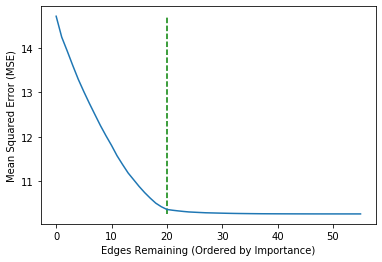

In [11]:
W_omp, edges, scores = m._OMP(X, get_order = True)
print(f"W_OMP:\n{np.round(W_omp, 2)}.\n")
h.score(X, W_omp, W_true, rounding = 3);

_, mses = order_edges(X, W_omp, edges, plotting = False);

plt.ylabel("Mean Squared Error (MSE)")
plt.xlabel("Edges Remaining (Ordered by Importance)")
plt.plot(range(0, len(edges) + 1), np.flip(mses))
plt.vlines(s, min(mses), max(mses), linestyle = '--', color = 'green')
plt.show()

### Second: OMP V3 on $X_2$
Now, we see that we have overfitted a bit on the noise. Let us fix that! We generate new data, and we check the error on this new dataset.

W_OMP_2:
[[-0.04  0.    0.   -0.04  0.04 -0.03  0.    0.    0.    0.  ]
 [-0.43  0.45  0.04 -0.    0.02 -0.09  0.    0.    0.    0.  ]
 [ 0.    0.    0.26  0.    0.    0.    0.    0.    0.    0.  ]
 [ 0.    0.    0.42  0.23  0.06  0.    0.    0.    0.    0.  ]
 [ 0.    0.   -0.06  0.    0.41  0.    0.    0.    0.    0.  ]
 [ 0.    0.   -0.05 -0.25  0.36  0.43  0.    0.    0.    0.  ]
 [-0.   -0.41 -0.42  0.06  0.01  0.03  0.31  0.    0.    0.  ]
 [-0.22 -0.02 -0.08 -0.    0.01  0.01 -0.36  0.04  0.    0.  ]
 [ 0.04 -0.01  0.03 -0.38 -0.01 -0.34 -0.03  0.07  0.34 -0.01]
 [-0.04  0.01  0.32  0.4   0.06  0.43 -0.05  0.04  0.    0.01]].

True Positive Rate: 1.0.
True Negative Rate: 0.5625.
False Prediction Rate: 0.6363636364
Accuracy: 0.65.
R-Squared: 0.2804376011
Mean Squared Error: 9.7677786236


C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)


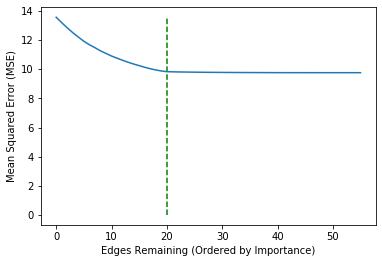

In [12]:
X_2 = h.generate_var_2(T, n, A_true, P_true)

W_omp_2, edges_2, scores_2 = m._OMP(X_2, get_order = True)
print(f"W_OMP_2:\n{np.round(W_omp_2, 2)}.\n")
h.score(X_2, W_omp_2, W_true, rounding = 10);

_, mses = order_edges(X_2, W_omp_2, edges_2, plotting = False);

plt.ylabel("Mean Squared Error (MSE)")
plt.xlabel("Edges Remaining (Ordered by Importance)")
plt.plot(range(0, len(edges) + 1), np.flip(mses))
plt.vlines(s, 0, max(mses), linestyle = '--', color = 'green')
plt.show()

In [13]:
# We score the coefficients of W_OMP_1 on X_2
h.score(X_2, W_omp, W_true, rounding = 10);

True Positive Rate: 1.0.
True Negative Rate: 0.5625.
False Prediction Rate: 0.6363636364
Accuracy: 0.65.
R-Squared: 0.2655969311
Mean Squared Error: 9.9810280901


In [14]:
# Let us see what happens when we remove edges
def order_edges(X, W, edges, plotting = True):
    
    W_list = [W]
    results = []
    
    # copy edges in a matrix that we iteratively shrink
    W_remove = W.copy()
    
    # print W
    if plotting:
        print(np.round(W_remove, 2), "\n")
        print()
        
    # check scores
    result = h.score(X, W_remove, W_true, printing = plotting)
    results.append(result)
    
    
    for i in range(len(edges)):
        # remove this edge from W
        W_remove[edges[-(i + 1)][0] - 1][edges[-(i + 1)][1] - 1] = 0
    
        ## check scores
        # tpr: True Positive Rate; Rate of correctly predicted edges.
        # fnr: True Negative Rate; Rate of corretly predicted non-edges.
        # fpr: False Prediction Rate; Rate of predicted edges that are not edges.
        # acc: Accuracy; Rater of correctly predicted edges and non-edges.
        # mse: Mean Squared Error: Average squared L2 loss per timestep
        result = h.score(X, W_remove, W_true, printing = plotting)
        
        results.append(result)
        W_list.append(W_remove.copy())
        
        # print W
        if plotting: 
            print(np.round(W_remove, 2), "\n")
            print()
    
    results = np.array(results)
    
    titles = ['True Positive Rate', 'False Negative Rate', 'False Prediction Rate', 'Accuracy', 'Mean Squared Error']
    
    if plotting:
        for i in range(4):
            plt.title(titles[i])
            plt.plot(range(0, len(edges) + 1), results[:, i])
            plt.vlines(n * (n + 1) / 2 - s, 0, 1, linestyle = '--')
            plt.show()
    
        plt.ylabel("Mean Squared Error (MSE)")
        plt.xlabel("Edges Remaining (Ordered by Importance)")
        plt.title(titles[-1])
        plt.plot(range(0, len(edges) + 1), np.flip(results[:, 4]))
        #plt.vlines(np.argmin(np.log(results[:, 4])), 0, max(np.log(results[:, 4])), linestyle = '--', color = 'green')
        plt.show()
    
    return W_list, results[:, 4]

In [15]:
def bootstrap(W_true, X, N):
    
    # get dimensions of X
    T, n = np.shape(X)
    
    # perform OMP on X
    W_omp, edges, scores = m._OMP(X, get_order = True)
    
    # get list of W_OMP
    W_list, _ = order_edges(X, W_omp, edges, plotting = False)
    
    # initialize bootstrap sampels
    mses_bootstrap = []
    
    # N: Number of times we bootstrap: simulate an X', compute mean squared errors
    for sample in range(N):
        
        # sample
        X_sample = h.generate_var_2(T, n, W_true, np.identity(n))
        
        # get mse's of applying W_omp to X_sample
        _, mses = order_edges(X_sample, W_omp, edges, plotting = False)
        
        # append to results
        mses_bootstrap.append(mses)
        
    # average bootstrap results
    mses_bootstrap_avg = np.average(np.array(mses_bootstrap), axis = 0)
    
    # plot, hopefully see a clear vline at correct place
    plt.ylabel("Mean Squared Error (MSE)")
    plt.xlabel("Edges Remaining (Ordered by Importance)")
    plt.plot(range(0, len(edges) + 1), np.flip(mses_bootstrap_avg))
    plt.vlines(np.argmin(np.flip(mses_bootstrap_avg)), min(mses_bootstrap_avg), max(mses_bootstrap_avg), linestyle = '--', color = 'green')
    plt.show()
    
    return W_list[np.argmin(mses_bootstrap_avg)]

C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)


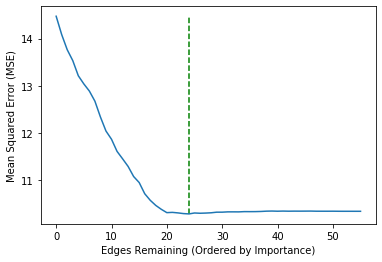

True Positive Rate: 1.0.
True Negative Rate: 0.95.
False Prediction Rate: 0.167
Accuracy: 0.96.
R-Squared: 0.3
Mean Squared Error: 10.305


In [16]:
W_bootstrap = bootstrap(W_true, X, 1)
h.score(X, W_bootstrap, W_true);

In [17]:
# compare W_bootstrap to W_omp
h.score(X, W_bootstrap, W_true, rounding = 10);

True Positive Rate: 1.0.
True Negative Rate: 0.95.
False Prediction Rate: 0.1666666667
Accuracy: 0.96.
R-Squared: 0.2996569777
Mean Squared Error: 10.3053902436


### Second approach
Second approach: Given a dataset $X$, we split it up in $X_1$ and $X_2$. Then, we use $X_1$ for estimating $W_OMP$, and $X_2$ for the bootstrapping.

True W:
[[ 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.  ]
 [ 0.    0.    0.37  0.    0.    0.    0.    0.    0.    0.  ]
 [-0.3   0.    0.    0.44  0.    0.    0.    0.    0.    0.  ]
 [ 0.25  0.44  0.    0.37  0.33  0.    0.    0.    0.    0.  ]
 [ 0.    0.27  0.49  0.3   0.    0.    0.    0.    0.    0.  ]
 [-0.49  0.    0.    0.    0.36  0.    0.43  0.    0.    0.  ]
 [ 0.   -0.28 -0.37 -0.32  0.    0.    0.    0.    0.    0.  ]
 [ 0.5   0.35  0.    0.    0.49  0.    0.3   0.43  0.    0.  ]
 [ 0.46  0.    0.    0.    0.    0.36  0.    0.44 -0.46  0.  ]].



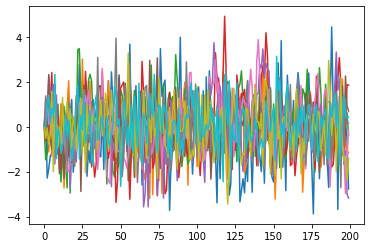

In [20]:
## Number of dimensions, number of edges, number of samples
# T should be twice as large now
T, n, s = 200, 10, 25

### Coefficient matrix
## First approach: A is a DAG, no model mismatch
A_true = h.generate_A(n, s, tril = False, low = 0.25, high = 0.50)

# set coefficients to be positive (else oscillating which does not make sense)
for i in range(len(A_true)):
    A_true[i][i] = np.abs(A_true[i][i])

## True permutation
P_true = np.identity(n) # np.random.permutation(np.identity(n))

## Datagenerating W
W_true = P_true.T @ A_true @ P_true
print(f"True W:\n{np.round(W_true, 2)}.\n")

## Generate series
X = h.generate_var_2(T, n, A_true, P_true)
plt.plot(X);

C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)


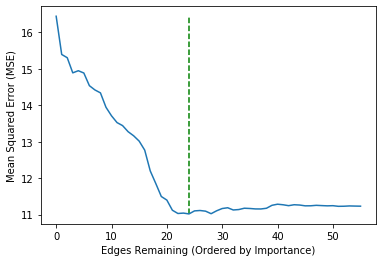

True Positive Rate: 0.88.
True Negative Rate: 0.9733333333.
False Prediction Rate: 0.0833333333
Accuracy: 0.95.
R-Squared: 0.329609319
Mean Squared Error: 10.5360643929


In [22]:
bootstrap_by_split(X, W_true)

In [21]:
def bootstrap_by_split(X, W_true):
    # split X
    X_1, X_2 = np.split(X, 2)

    # get W estimate from first split
    W_OMP, edges, _ = m._OMP(X_1, get_order = True)

    # get mse's of applying W_omp to second split
    W_list, mses = order_edges(X_2, W_OMP, edges, plotting = False)

    # get W_bootstrap
    W_bootstrap = W_list[np.argmin(mses)]

    # plot, hopefully see a clear vline at correct place
    plt.ylabel("Mean Squared Error (MSE)")
    plt.xlabel("Edges Remaining (Ordered by Importance)")
    plt.plot(range(0, len(edges) + 1), np.flip(mses))
    plt.vlines(np.argmin(np.flip(mses)), min(mses), max(mses), linestyle = '--', color = 'green')
    plt.show()

    # compare W_bootstrap to W_true
    h.score(X, W_bootstrap, W_true, rounding = 10);

In [23]:
def bootstrap_by_split_multiple(X, W_true, N):
    # split X
    X_splits = np.array_split(X, N)
    
    X_estimate = X_splits[0]
    X_bootstraps = X_splits[1:]

    # get W estimate from first split
    W_OMP, edges, _ = m._OMP(X_estimate, get_order = True)

    # get list of W_OMP
    W_list, _ = order_edges(X, W_OMP, edges, plotting = False)
    
    # to save results
    mses_bootstrap = []
    
    for X_bootstrap in X_bootstraps:
        
        # get mse's of applying W_omp to split
        W_list, mses = order_edges(X_bootstrap, W_OMP, edges, plotting = False)

        # append to results
        mses_bootstrap.append(mses)
        
    # average bootstrap results
    mses_bootstrap_avg = np.average(np.array(mses_bootstrap), axis = 0)
    
    # get W_bootstrap
    W_bootstrap = W_list[np.argmin(mses)]

    # plot, hopefully see a clear vline at correct place
    plt.ylabel("Mean Squared Error (MSE)")
    plt.xlabel("Edges Remaining (Ordered by Importance)")
    plt.plot(range(0, len(edges) + 1), np.flip(mses))
    plt.vlines(np.argmin(np.flip(mses)), min(mses), max(mses), linestyle = '--', color = 'green')
    plt.show()

    # compare W_bootstrap to W_true
    h.score(X, W_bootstrap, W_true, rounding = 10);

C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)


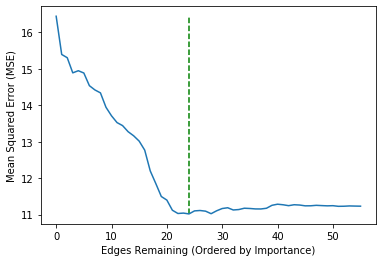

True Positive Rate: 0.88.
True Negative Rate: 0.9733333333.
False Prediction Rate: 0.0833333333
Accuracy: 0.95.
R-Squared: 0.329609319
Mean Squared Error: 10.5360643929


C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)


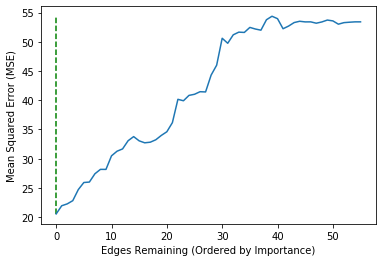

True Positive Rate: 0.0.
True Negative Rate: 1.0.
False Prediction Rate: 0.0
Accuracy: 0.75.
R-Squared: 0.0
Mean Squared Error: 15.7119777764


C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)


In [24]:
bootstrap_by_split(X, W_true)
bootstrap_by_split_multiple(X, W_true, 15)

(199, 10)


C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)


(199, 10)


C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)


(199, 10)


C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)


(199, 10)


C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)


(199, 10)


C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)


(199, 10)


C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)


(199, 10)


C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)


(199, 10)


C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)


(199, 10)


C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)


(199, 10)


C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)


(199, 10)


C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)


(199, 10)


C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)


(199, 10)


C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)


(199, 10)


C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)


(199, 10)


C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)


(199, 10)


C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)


(199, 10)


C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)


(199, 10)


C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)


(199, 10)


C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)


(199, 10)


C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)


(199, 10)


C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)


(199, 10)


C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)


(199, 10)


C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)


(199, 10)


C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)


(199, 10)


C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)


(199, 10)


C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)


(199, 10)


C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)


(199, 10)


C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)


(199, 10)


C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)


(199, 10)


C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)


(199, 10)


C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)


(199, 10)


C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)


(199, 10)


C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)


(199, 10)


C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)


(199, 10)


C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)


(199, 10)


C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)


(199, 10)


C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)


(199, 10)


C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)


(199, 10)


C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)


(199, 10)


C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)


(199, 10)


C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)


(199, 10)


C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)


(199, 10)


C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)


(199, 10)


C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)


(199, 10)


C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)


(199, 10)


C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)


(199, 10)


C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)


(199, 10)


C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)


(199, 10)


C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)


(199, 10)


C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)


(199, 10)


C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)


(199, 10)


C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)


(199, 10)


C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)


(199, 10)


C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)


(199, 10)


C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)


(199, 10)


C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)


(199, 10)


C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)


(199, 10)


C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)


(199, 10)


C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)


(199, 10)


C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)


(199, 10)


C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)


(199, 10)


C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)


(199, 10)


C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)


(199, 10)


C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)


(199, 10)


C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)


(199, 10)


C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)


(199, 10)


C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)


(199, 10)


C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)


(199, 10)


C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)


(199, 10)


C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)


(199, 10)


C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)


(199, 10)


C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)


(199, 10)


C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)


(199, 10)
(199, 10)


C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)
C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)


(199, 10)


C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)


(199, 10)


C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)


(199, 10)


C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)


(199, 10)


C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)


(199, 10)


C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)


(199, 10)


C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)


(199, 10)


C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)


(199, 10)


C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)


(199, 10)


C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)


(199, 10)


C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)


(199, 10)


C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)


(199, 10)


C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)


(199, 10)


C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)


(199, 10)


C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)


(199, 10)


C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)


(199, 10)


C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)


(199, 10)


C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)


(199, 10)


C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)


(199, 10)


C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)


(199, 10)


C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)


(199, 10)


C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)


(199, 10)


C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)


(199, 10)


C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)


(199, 10)


C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)


(199, 10)


C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)


(199, 10)


C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)


(199, 10)


C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)


(199, 10)


C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)


(199, 10)


C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)


(199, 10)


C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)


(199, 10)


C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)


(199, 10)


C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)


(199, 10)


C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)


(199, 10)


C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)


(199, 10)


C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)


(199, 10)


C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)


(199, 10)


C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)


(199, 10)


C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)


(199, 10)


C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)


(199, 10)


C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)


(199, 10)


C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)


(199, 10)


C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)


(199, 10)


C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)


(199, 10)


C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)


(199, 10)


C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)


(199, 10)


C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)


(199, 10)


C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)


(199, 10)


C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)


(199, 10)


C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)


(199, 10)


C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)


(199, 10)


C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)


(199, 10)


C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)


(199, 10)


C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)


(199, 10)


C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)


(199, 10)


C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)


(199, 10)


C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)


(199, 10)


C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)


(199, 10)


C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)


(199, 10)


C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)


(199, 10)


C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)


(199, 10)


C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)


(199, 10)


C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)


(199, 10)


C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)


(199, 10)


C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)


(199, 10)


C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)


(199, 10)


C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)


(199, 10)


C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)


(199, 10)


C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)


(199, 10)


C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)


(199, 10)


C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)


(199, 10)


C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)


(199, 10)


C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)


(199, 10)


C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)


(199, 10)


C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)


(199, 10)


C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)


(199, 10)


C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)


(199, 10)


C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)


(199, 10)


C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)


(199, 10)


C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)


(199, 10)


C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)


(199, 10)


C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)


(199, 10)


C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)


(199, 10)


C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)


(199, 10)


C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)


(199, 10)


C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)


(199, 10)


C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)


(199, 10)


C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)


(199, 10)


C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)


(199, 10)


C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)


(199, 10)


C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)


(199, 10)


C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)


(199, 10)


C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)


(199, 10)


C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)


(199, 10)


C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)


(199, 10)


C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)


(199, 10)


C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)


(199, 10)


C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)


(199, 10)


C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)


(199, 10)


C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)


(199, 10)


C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)


(199, 10)


C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)


(199, 10)


C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)


(199, 10)


C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)


(199, 10)


C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)


(199, 10)


C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)


(199, 10)


C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)


(199, 10)


C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)


(199, 10)


C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)


(199, 10)


C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)


(199, 10)


C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)


(199, 10)


C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)


(199, 10)


C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)


(199, 10)


C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)


(199, 10)


C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)


(199, 10)


C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)


(199, 10)


C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)


(199, 10)


C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)


(199, 10)


C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)


(199, 10)


C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)


(199, 10)


C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)


(199, 10)


C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)


(199, 10)


C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)


(199, 10)


C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)


(199, 10)


C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)


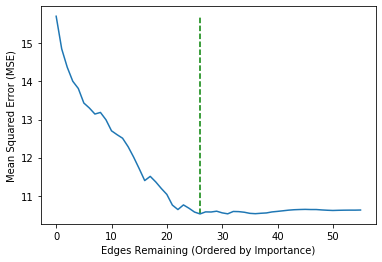

True Positive Rate: 1.0.
True Negative Rate: 0.987.
False Prediction Rate: 0.038
Accuracy: 0.99.
R-Squared: 0.347
Mean Squared Error: 10.268


C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
C:\Users\s165048\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\_stats_mstats_common.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)


In [30]:
def loocv(X, W_true):
    
    # to save results
    loocv_mses = []
    
    for i in range(0, np.shape(X)[0] - 1):
        # pair to compare
        # remove one
        X_train = np.delete(X, i, axis = 0)
        
        # get one test
        X_test = X[[i, i + 1], :]
        
        print(np.shape(X_train))
        
        # train on X_train
        W_OMP, edges, _ = m._OMP(X_train, get_order = True)
        
        # test on X_test
        _, mses = order_edges(X_test, W_OMP, edges, plotting = False)
    
        loocv_mses.append(mses)
        
    # average bootstrap results
    loocv_mses_avg = np.average(np.array(loocv_mses), axis = 0)

    # plot, hopefully see a clear vline at correct place
    plt.ylabel("Mean Squared Error (MSE)")
    plt.xlabel("Edges Remaining (Ordered by Importance)")
    plt.plot(range(0, len(edges) + 1), np.flip(loocv_mses_avg))
    plt.vlines(np.argmin(np.flip(loocv_mses_avg)), min(loocv_mses_avg), max(loocv_mses_avg), linestyle = '--', color = 'green')
    plt.show()

    # get W_omp for W_list
    W_OMP, edges, _ = m._OMP(X, get_order = True)
        
    # get list of Ws
    W_list, _ = order_edges(X, W_OMP, edges, plotting = False)
    
    # get W that minimizes the mse
    W_loocv = W_list[np.argmin(loocv_mses_avg)]
    
    # compare W_bootstrap to W_true
    h.score(X, W_loocv, W_true, rounding = 3);

W_loocv = loocv(X, W_true)

Okay, we have found the number of edges that minimizes the mean squared error using LOOCV, but what is the optimal W_then? 